<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Amazon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip

--2021-07-30 06:48:12--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.36.86
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.36.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip  100%[===================>]   1012M  13.9MB/s    in 76s     

2021-07-30 06:49:29 (13.3 MB/s) - ‘dataset52a7b21.zip’ saved [1061576029/1061576029]



In [ ]:
!unzip /content/dataset52a7b21.zip

Archive:  /content/dataset52a7b21.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/.~lock.train.csv#  


In [ ]:
!mv /content/dataset/ /content/drive/MyDrive/

In [1]:
 from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
train_path = '/content/drive/MyDrive/dataset/train.csv'
test_path = '/content/drive/MyDrive/dataset/test.csv'
sample_sub_path = '/content/drive/MyDrive/dataset/sample_submission.csv'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv


In [3]:
# Loading in the data 
train_data = pd.read_csv(train_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)

# Loading the test dataset 
# test_data = pd.read_csv(test_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)
# # Sample submission 
# sample_sub = pd.read_csv(sample_sub_path , escapechar = "\\" , quoting = csv.QUOTE_NONE)



## Working with a subset 

#### Multi-Input Model 

In [4]:
# Getting the subset of the sample 
train_sample = train_data.sample(frac= 1 , random_state= 42)
#val_sample = train_data.sample(frac = 0.1 , random_state= 3)

In [ ]:
X = train_sample.drop('BROWSE_NODE_ID' , axis = 1)
y = train_sample['BROWSE_NODE_ID']

X.shape , y.shape

((2903024, 4), (2903024,))

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# strat_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.3 , train_size= 0.7  , random_state = 42)

In [ ]:
train_sample.head().T

,2297143,2078681,1125035,1928801,864509
TITLE,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",Nivea Face Sun Block Whitening Cream SPF 50 Pa...,ROZVEH Women's Shift Brown Dress,Narayan Creation Pashmina Palazzo Suit Dupatta...,Q-rious Women's Silicon Strap Spagettis/Camiso...
DESCRIPTION,The mirrors easily mount to the vehicle's left...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",Narayan creatins pashmina unstitched palazzo s...,Trendy Q-rious Spagetti with sequin detachable...
BULLET_POINTS,"[It is small, but it is smart mirror, and work...",NIVEA face SUN Block Whitening Cream SPF 50 PA ++,"[Material: Super Fine Rayon, Brown Floral Prin...",NaN,"[Silicon and Elastic strap option,Detachable S..."
BRAND,AMSIK,Nivea,ROZVEH,Generic,Q-rious
BROWSE_NODE_ID,32296,35,1724,465,2003


In [ ]:
y

2297143    32296
2078681       35
1125035     1724
1928801      465
864509      2003
           ...  
1692743     1217
2356330    21895
2229084     1251
2768307     1084
2219110    45027
Name: BROWSE_NODE_ID, Length: 2903024, dtype: int64

In [ ]:
for train_index , test_index in strat_split.split(X, y):
  X_train , X_test = X[train_index] , X[test_index]
  y_train , y_test = y[train_index] , y[test_index]

NameError: ignored

In [14]:
train_sample.BROWSE_NODE_ID.value_counts()

1045       107637
5           35441
1251        25913
1052        22955
4           17107
            ...  
1264876         1
643270          1
1993035         1
1655214         1
1533196         1
Name: BROWSE_NODE_ID, Length: 9568, dtype: int64

In [ ]:
train_sample.shape , val_sample.shape

NameError: ignored

In [ ]:
train_sample.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003


In [ ]:
test_data.head(10)

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero
5,6,NiZHi TT-028 MP3 Mini Digital Portable Music P...,Features: - Hi-Fi & clear loud sound output. -...,"[Supports micro SD/TF card, USB flash disk, FM...",Nizhi
6,7,"IXS Men's RS-200 Gloves (Black/Hi-Viz Yellow, ...",Sport glove made of goatskin leather . Light t...,NaN,IXS
7,8,C00093227 500ml Fridge Care,NaN,NaN,NaN
8,9,"NBA Los Angeles Clippers Dorm Room Fridge, 1.7...","Dorm room, game room, TV room, fan cave or any...",[Features 7 Cooling Settings for Refrigeration...,Boelter Brands
9,10,"One Industries Zero Zerope Gloves (Cyan/Red, M...",Manufacturers Part Number: 52083-334-009,Manufacturers Part Number: 52083-334-009,One Industries


In [ ]:
train_data.isna().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
dtype: int64

In [ ]:
train_sample.fillna(method= )

In [5]:
train_sample['Info'] = train_sample.DESCRIPTION.astype(str) + '  '+  train_sample.BULLET_POINTS.astype(str)
train_sample['title'] = train_sample.TITLE.astype(str)

In [7]:
train_sample.head(10)

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,Info,title
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296,The mirrors easily mount to the vehicle's left...,"Amsik®Blind Spot Round Mirror Black, (Real Gla..."
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Face Sun Block Whitening Cream SPF 50 Pa...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",ROZVEH Women's Shift Brown Dress
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Narayan Creation Pashmina Palazzo Suit Dupatta...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Women's Silicon Strap Spagettis/Camiso...
1613202,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...,NaN,"[Made with a portion of recycled polyester,Pat...",Hanes,3355,nan [Made with a portion of recycled polyeste...,Hanes Men's Pullover EcoSmart Fleece Hooded Sw...
1794644,Lixada Aluminum Alloy Stem Bike Bicycle Cyclin...,Aluminum alloy construction makes it a lightwe...,"[For 31.8mm handlebar.,For 28.6mm front fork s...",Lixada,61384,Aluminum alloy construction makes it a lightwe...,Lixada Aluminum Alloy Stem Bike Bicycle Cyclin...
1306751,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...,Explore wide range of home décor products from...,"[Quality Guaranteed,Easy Return and Exchange,L...",Verca,1287,Explore wide range of home décor products from...,Verca Cotton;Fabric Krishna Bal Gopal Poshak (...
2031708,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...,Pure Satin Silk Lehenga Blouse Set. Featuring ...,"[Wash Care : Dry Clean and Hend Wash.,In the P...",EVERWILLOW,5173,Pure Satin Silk Lehenga Blouse Set. Featuring ...,EVERWILLOW Girl's Satin Silk Lehenga Choli (Pu...
1093990,Vimes All Side Protection Sleek Rubberised Mat...,"<p>""</p> <p><strong>Vimes back cover case for ...",[Camera Protection Technology - Introducing Ou...,VIMES,2040,"<p>""</p> <p><strong>Vimes back cover case for ...",Vimes All Side Protection Sleek Rubberised Mat...


In [9]:
train_sample.isna().sum()

TITLE                 32
DESCRIPTION       362127
BULLET_POINTS      83196
BRAND              28235
BROWSE_NODE_ID         0
Info                   0
title                  0
dtype: int64

In [ ]:
train_sample['BROWSE_NODE_ID']

2297143    32296
2078681       35
1125035     1724
1928801      465
864509      2003
           ...  
1692743     1217
2356330    21895
2229084     1251
2768307     1084
2219110    45027
Name: BROWSE_NODE_ID, Length: 2903024, dtype: int64

In [ ]:
train_sample[['TITLE' , 'Info']].values

array([['Amsik®Blind Spot Round Mirror Black, (Real Glass Made, 2 Pcs/Set) for Toyota Fortuner',
        'The mirrors easily mount to the vehicle\'s left and right side mirrors with pre in sided foam tape and successfully achieved the goal of adding vehicle by enhancing the visibility for the driver Which helping the driver to make safe lane change other drivers in the "blind spot" and helping reduce accidents. Includes one pair of mirrors. 2" size with universal size. Does not spoil the mirror look even if removed later. it is best round blind spot mirror from crest.  [It is small, but it is smart mirror, and works together with the side mirror so great,The blind spots mirrors can be 360° rotatable + 30° sway adjustable with the angle regulator type .,Upgraded real glass mirror body, equips with strong 3M adhesive tape for fast installation.,2 Pcs/set with double tape packaged in all English instruction.]'],
       ['Nivea Face Sun Block Whitening Cream SPF 50 Pa ++ Made in Thailand',

In [6]:
new_train_sample = train_sample.copy()
new_train_sample.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,Info,title
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",The mirrors easily mount to the vehicle's left...,"[It is small, but it is smart mirror, and work...",AMSIK,32296,The mirrors easily mount to the vehicle's left...,"Amsik®Blind Spot Round Mirror Black, (Real Gla..."
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,NIVEA face SUN Block Whitening Cream SPF 50 PA ++,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...,Nivea Face Sun Block Whitening Cream SPF 50 Pa...
1125035,ROZVEH Women's Shift Brown Dress,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...","[Material: Super Fine Rayon, Brown Floral Prin...",ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d...",ROZVEH Women's Shift Brown Dress
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Narayan creatins pashmina unstitched palazzo s...,NaN,Generic,465,Narayan creatins pashmina unstitched palazzo s...,Narayan Creation Pashmina Palazzo Suit Dupatta...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Trendy Q-rious Spagetti with sequin detachable...,"[Silicon and Elastic strap option,Detachable S...",Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...,Q-rious Women's Silicon Strap Spagettis/Camiso...


In [ ]:
new_train_sample = new_train_sample.drop(columns = ['DESCRIPTION' , 'BULLET_POINTS'] , axis = 1)

In [ ]:
new_train_sample

,TITLE,BRAND,BROWSE_NODE_ID,Info
2297143,"Amsik®Blind Spot Round Mirror Black, (Real Gla...",AMSIK,32296,The mirrors easily mount to the vehicle's left...
2078681,Nivea Face Sun Block Whitening Cream SPF 50 Pa...,Nivea,35,Nivea Sun Fac Sun Block Whitening Cream Spf 50...
1125035,ROZVEH Women's Shift Brown Dress,ROZVEH,1724,"<p>Super Fine Rayon,&nbsp;Brown Floral Print d..."
1928801,Narayan Creation Pashmina Palazzo Suit Dupatta...,Generic,465,Narayan creatins pashmina unstitched palazzo s...
864509,Q-rious Women's Silicon Strap Spagettis/Camiso...,Q-rious,2003,Trendy Q-rious Spagetti with sequin detachable...
...,...,...,...,...
1692743,Zemic Baby Waterproof Double Sided Mat (6 X 5 ...,Zemic,1217,"<p>SOFT FOAM PLAYMAT: Extra-cushioned, soft PE..."
2356330,The Design Cart Stainless Steel Style A Needle...,The Design Cart,21895,Use these aari needles for thread work on silk...
2229084,SOCH Women's Cotton Straight Kurta NC KT 4402-...,Soch,1251,"nan [Color Name: Black,100% Cotton,Knee lengt..."
2768307,Kuber Industries 100 Percent Cotton 144 TC Sin...,Kuber Industries,1084,"nan [Color: Light Green, Size Name: Standard,..."


In [18]:
# Are there 9919 classes 
train_sample.BROWSE_NODE_ID.value_counts()

1045       215698
5           70318
1251        51929
1052        45553
4           34177
            ...  
279112          1
822060          1
1337233         1
2136811         1
248936          1
Name: BROWSE_NODE_ID, Length: 9919, dtype: int64

Creating a token level embedding 

In [ ]:
# Picking up the train text data 
info_train_sentences = new_train_sample['Info'].to_list()
title_train_sentences = new_train_sample['TITLE'].astype(str).to_list()

# Now our val dataset 


len(info_train_sentences) , len(title_train_sentences)

(2903024, 2903024)

In [ ]:
title_train_sentences[:10]

['Amsik®Blind Spot Round Mirror Black, (Real Glass Made, 2 Pcs/Set) for Toyota Fortuner',
 'Nivea Face Sun Block Whitening Cream SPF 50 Pa ++ Made in Thailand',
 "ROZVEH Women's Shift Brown Dress",
 'Narayan Creation Pashmina Palazzo Suit Dupatta Material (Un-Stitched) Pink',
 "Q-rious Women's Silicon Strap Spagettis/Camisole Magenta",
 "Hanes Men's Pullover EcoSmart Fleece Hooded Sweatshirt, Charcoal Heather, L",
 'Lixada Aluminum Alloy Stem Bike Bicycle Cycling Clamp Stem 31.8Mm ±17° MTB Road Bike Stem 70Mm 80Mm 90Mm 110Mm',
 'Verca Cotton;Fabric Krishna Bal Gopal Poshak (Blue)',
 "EVERWILLOW Girl's Satin Silk Lehenga Choli (Purple)",
 'Vimes All Side Protection Sleek Rubberised Matte Soft Silicon Back Case For Redmi Note 5 (Black Mi Note 5 - 2018) (It is not compatibe with Redmi 5 And Note 5 Pro)']

In [ ]:
# Average sequence length 
info_sent_lens = [len(sentence.split()) for sentence in info_train_sentences]
title_sent_lens = [len(title.split()) for title in title_train_sentences]

avg_sent_len_info = np.mean(info_sent_lens)
avg_sent_len_title = np.mean(title_sent_lens)

avg_sent_len_info , avg_sent_len_title

(124.08260627538732, 13.541006550410883)

In [ ]:
round(avg_sent_len_info) , round(avg_sent_len_title)

(124, 14)

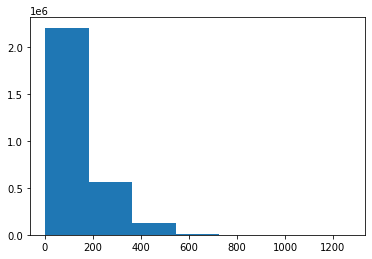

In [ ]:
# Distribution of the tokens 
plt.hist(info_sent_lens , bins = 7);

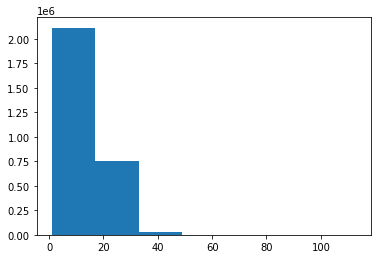

In [ ]:
plt.hist(title_sent_lens , bins = 7);

In [ ]:
# How long of a sentence covers 95% of a length 
info_output_seq_len = int(np.percentile(info_sent_lens , 95))
title_output_seq_len = int(np.percentile(title_sent_lens , 95))

info_output_seq_len , title_output_seq_len

(358, 27)

In [ ]:
# Maximum sentence in the training sentence of both info and title 
max(info_sent_lens) , max(title_sent_lens)

(1270, 113)

In [ ]:
round(len(info_train_sentences) / 6)

483837

In [ ]:
from random import sample 
little_info_train_sentences = sample(info_train_sentences ,683837)
len(little_info_train_sentences)

683837

In [ ]:
# Creating a text vectorizer layer for info (token level embedding)
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

info_text_vect_token_layer = TextVectorization(max_tokens= 5000 , 
                                               output_sequence_length = info_output_seq_len)

# Adapting the layer on the train data 
info_text_vect_token_layer.adapt(little_info_train_sentences)

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(info_train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{info_text_vect_token_layer([target_sentence])}")

Text:
May Your Birthday Be Warm. Teddy Bear Newborn Baby Birthday Train Figurine. Made from bisque porcelain. Approximately 3 inches tall (8cm). Includes original manufacturers box and packaging. Made by Precious Moments. Welcome a new baby to the world with the Precious Moments Birthday Train caboose. A sweet little teddy bear offers his favorite blankie to make sure baby is warm and cozy on their wild ride called childhood.  [This cozy engine of the Precious Moments Birthday Train welcomes a new baby into the world. Attaches by pull rope to any of the Birthday Train figurines from the baby through age 16,As part of a series, it is a gift that begins a tradition, one that will be looked forward to and then cherished for years to come,A thoughtful birthday gift for any baby!,Bisque porcelain, meticulously hand painted,Approximately 3 inches high]

Length of text: 140

Vectorized text:
[[ 109    9  339   21  400 2684 2136 3182  215  339 3457    1   26   15
     1    1 2223  101  160 230

In [ ]:
# Creating a text vectorizer layer for title (token level embedding)
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

title_text_vect_token_layer = TextVectorization(max_tokens= 3000 , 
                                               output_sequence_length = title_output_seq_len)

# Adapting the layer on the train data 
title_text_vect_token_layer.adapt(title_train_sentences)

In [ ]:
# Test out text vectorizer (title)
import random
target_sentence = random.choice(title_train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{title_text_vect_token_layer([target_sentence])}")

Text:
Nena Fashion Cotton Saree With Blouse Piece(Rama Small Chex Lining_Rama_Free Size)

Length of text: 11

Vectorized text:
[[  1  82  11  90   3 122   1 132   1   1  23   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]]


In [ ]:
# Now one hot encoding the labels 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
sample_train_labels_one_hot = one_hot_encoder.fit_transform()

TypeError: ignored

In [10]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

AttributeError: ignored

In [8]:
label = new_train_sample['BROWSE_NODE_ID'].to_numpy()
label.shape

(2903024,)

kill: (2794): No such process


In [12]:
train_labels = tf.one_hot(label , depth= 9919)

ResourceExhaustedError: ignored

# trying to make model with universal scentence encoder 


In [7]:
import tensorflow_hub as hub
import tensorflow as tf

In [31]:
base_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable = False)


In [49]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)
x = base_layer(inputs)
#x = tf.keras.layers.Dense(264, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation= 'relu')(x)
x  = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(9919, activation ='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [50]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 9919)              644735    
Total params: 257,475,391
Trainable params: 677,567
Non-trainable params: 256,797,824
_________________________________________________________________


In [51]:
model.compile(loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = 'accuracy')

In [29]:
train_dataset= tf.data.Dataset.from_tensor_slices((new_train_sample['title'].values, new_train_sample['BROWSE_NODE_ID'].to_numpy()))


In [42]:
train_dataset = train_dataset.shuffle(buffer_size= 1000).batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [43]:
for text , lab in train_dataset.take(1):
  print(text)
  print(lab)

tf.Tensor(
[b'Lilyette by Bali Tailored Strapless Minimizer Bra_Black_38DD'
 b'Kiran Enterprises | Kiran 12MF4L-B Motorcycle Battery | 12V Battery'
 b'THE BROOKLYN CREAMERY Bubbleyum, 120 ml'
 b'ELECTROPRIME a15090400ux0752 240# Abrasives Round Rod Sharpening Grinding Oil Stone Whetstone 3Pcs,'
 b'CopperKraft Ganga Seamless Pure Copper Bottle Glossy & Mirror Finish 1000 ml'
 b'Fastside Retractable Badge Reel with Claw Clasp and Clip for Id Card Holders (Black)'
 b'ARIHANT GEMS & JEWELS Pearl 9.25 Ratti Natural and IIGS Certified South Sea Pearl Moti Non-Precious Metal Astrological Gemstone for Men and Women'
 b'OZANGO Bike Customized Handlebar Chrome Silver Dual Curved Handle Bar Rod Thick Pipe for Royal Enfield Classic Desert Storm'
 b'Athah Designs Pok\xc3\xa9mon Raikou Entei Suicune Legendary Pok\xc3\xa9mon Wall Poster 13*19 inches Matte Finish'
 b'RGSVCases Name II Initial II Letter Floral Pattern Alphabet M Hard Printed Designer Case for Motorola Moto E4 Plus XT1770, XT1773 Back C

In [52]:
first_model = model.fit(train_dataset,
                        epochs = 5 )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


23464/90720 [======>.......................] - ETA: 12:56 - loss: nan - accuracy: 0.0010

KeyboardInterrupt: ignored

In [ ]:
# Now one hot encoding the labels 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)
train_labels = one_hot_encoder.fit_transform(new_train_sample['BROWSE_NODE_ID'].to_numpy().reshape(-1 , 1))

In [54]:
train_labels

array([[32296],
       [   35],
       [ 1724],
       ...,
       [ 1251],
       [ 1084],
       [45027]])